In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Read the csv file into a pandas DataFrame
# lsd = pd.read_csv('../Resources/lsd.csv')
# lsd.head()

In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

# X = lsd.tc.values.reshape(-1, 1)
# y = lsd.score.values.reshape(-1, 1)

# print("Shape: ", X.shape, y.shape)
# X

In [ ]:
# Plot the data

# YOUR CODE HERE

In [ ]:
# Create the model and fit the model to the data

# from sklearn.linear_model import LinearRegression

# YOUR CODE HERE

In [ ]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

# YOUR CODE HERE

In [ ]:
# Print the coefficient and the intercept for the model

# YOUR CODE HERE

In [ ]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

# x_min = np.array([[X.min()]])
# x_max = np.array([[X.max()]])
# print(f"Min X Value: {x_min}")
# print(f"Max X Value: {x_max}")

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

In [17]:
cal_housing = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [11]:
cal_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [14]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [21]:
y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)

In [22]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")


Training MLPRegressor...
done in 11.606s
Test R2 score: 0.82


Computing partial dependence plots...
done in 7.602s


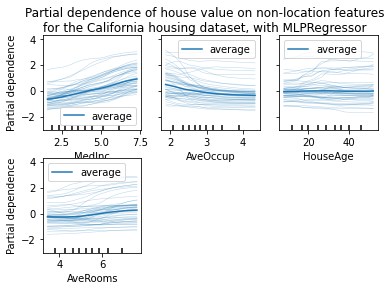

In [23]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

print('Computing partial dependence plots...')
tic = time()
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']
display = plot_partial_dependence(
       est, X_train, features, kind="both", subsample=50,
       n_jobs=3, grid_resolution=20, random_state=0
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence of house value on non-location features\n'
    'for the California housing dataset, with MLPRegressor'
)
display.figure_.subplots_adjust(hspace=0.3)